In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

training_data_AM_0 = datasets.ImageFolder(
    root="/content/drive/Othercomputers/My MacBook Air/Desktop/LaneDetectionData",
    transform=ToTensor()
)

In [ ]:
from torch.utils.data import DataLoader
train_dataloader = DataLoader(training_data_AM_0, batch_size=64, shuffle=False)
train_dataloader

In [ ]:
for data in train_dataloader:
    d = data
    break

In [ ]:
d[0].shape

torch.Size([64, 3, 590, 1640])

In [ ]:
import torchvision.transforms as transforms
import cv2
import numpy as np
import torchvision
from google.colab.patches import cv2_imshow
for i, batch in enumerate(train_dataloader):
    images, labels = batch
    #for j in range(len(labels)):
    print(images)
            #plt.imshow(images[j+1].numpy()[0])


Feature batch shape: torch.Size([64, 3, 590, 1640])
Labels batch shape: torch.Size([64])


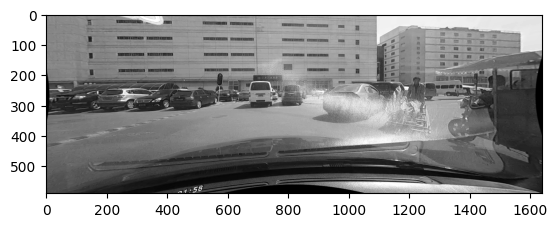

Label: 0


In [ ]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img.numpy()[0], cmap="gray")
plt.show()
print(f"Label: {label}")

In [ ]:
training_data_AM_0.classes

['05181432_0203.MP4',
 '05181520_0219.MP4',
 '05181608_0235.MP4',
 '05181656_0251.MP4',
 '05181743_0267.MP4',
 '05181831_0283.MP4',
 '05181919_0299.MP4',
 '05182007_0315.MP4',
 '05190613_0331.MP4',
 '05190703_0347.MP4',
 '05190751_0363.MP4',
 '05190839_0379.MP4',
 '05190927_0395.MP4',
 '05191020_0411.MP4',
 '05191310_0427.MP4',
 '05191358_0443.MP4',
 '05191447_0459.MP4',
 '05191535_0475.MP4',
 '05191626_0491.MP4',
 '05191714_0507.MP4']

In [ ]:
len(training_data_AM_0[0])

2

In [ ]:
training_data_AM_0[0][1]

0

In [ ]:
import os
import torch
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt


class CustomDataset(Dataset):
    def __init__(self, data_root, transform=None):
        self.data_root = data_root
        self.transform = transform

        # Create a list of image and label file paths by traversing subdirectories
        self.image_files = []
        self.label_files = []

        for root, dirs, files in os.walk(data_root):
            for file in files:
                if file.endswith('.jpg') or file.endswith('.png'):  # Adjust file extensions as needed
                    self.image_files.append(os.path.join(root, file))
                if file.endswith('.lines.txt'):
                    self.label_files.append(os.path.join(root, file))

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        image_file = self.image_files[idx]

        # Assuming label filenames correspond to image filenames with a '.txt' extension
        label_file = image_file.replace('.jpg', '.lines.txt')

        image = Image.open(image_file)

        # Read the content of the text file (label)
        with open(label_file, 'r') as file:
            label = file.read()

        if self.transform:
            image = self.transform(image)

        return image, label

# Set the path to the root directory containing all image and text files in subdirectories
data_root = '/content/drive/Othercomputers/My MacBook Air/Desktop/LaneDetectionData/driver_37_30frame'

# Define any image transformations you need (e.g., resizing, normalizing)
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
])

# Create a dataset
dataset = CustomDataset(data_root, transform)

# Create a DataLoader
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

# Iterate through the DataLoader to access images and label content
for images, labels in dataloader:
    # Now, you can work with the images and label content in each batch
    # print("Images in batch:", images)
    # print("Label content in batch:", labels)
    for label in labels:
        l = label
        break
    break

In [ ]:
new = l.split(" \n")


In [ ]:
#lets create a image file list with images and text files
from os import walk
import numpy as np

img_files = []
label_data=[]
mean_array=[]
std_array = []
coordinate_list=[]
for dirpath, dirnames, filenames in walk("/content/drive/Othercomputers/My MacBook Air/Desktop/LaneDetectionData/driver_37_30frame"):
    for files in filenames :
        if(files.split(".")[-1]=="jpg"):
            txt_file = os.path.join(dirpath , files.split(".")[0]+str(".lines.txt") )
            coordinates , data , mean_val , std_val  = remove_newlines(txt_file)

            if(data is not None):
                img_files.append(os.path.join(dirpath,files))
                label_data.append( data )
                mean_array.append(mean_val)
                std_array.append(std_val)
                coordinate_list.append(coordinates)
            break


[ 411.83   590.     422.263  580.     433.157  570.     443.325  560.
  454.219  550.     464.387  540.     475.281  530.     485.449  520.
  496.343  510.     507.237  500.     517.405  490.     528.299  480.
  538.467  470.     549.362  460.     559.876  450.     570.044  440.
  580.938  430.     591.106  420.     602.     410.     612.894  400.
  623.062  390.     633.956  380.     644.124  370.     655.018  360.
  665.186  350.     676.08   340.    1330.54   590.    1313.13   580.
 1295.77   570.    1278.4    560.    1260.17   550.    1242.81   540.
 1225.44   530.    1208.08   520.    1190.71   510.    1173.35   500.
 1155.11   490.    1137.75   480.    1120.38   470.    1103.02   460.
 1085.8    450.    1068.44   440.    1050.21   430.    1032.84   420.
 1015.48   410.     998.111  400.     980.746  390.     963.381  380.
  945.148  370.     927.783  360.     910.418  350.     893.053  340.
  875.688  330.   ]
[]
[ -21.8116  460.       17.444   450.       57.1774  440.       95.9

In [ ]:
def remove_newlines(fname):
    data=[]
    coordinates =[]
    flist = open(fname).readlines()
    for s in flist:
        data.extend([d for d in s.rstrip('\n').split(" ")  if d!=''])

    data = np.array(data).astype(np.float32)
    print(data)
    for idx in range(0,len(data),2):
        coordinates.append(data[idx:idx+2])
    if(len(data)==0):
        return None , None  , 0 , 0

    else:

        mean_val = np.mean(data)
        std_val = np.std(data)
        return coordinates , data , mean_val  , std_val

In [ ]:
coordinates , data , mean_val  , std_val = remove_newlines(new)

ValueError: ignored

In [ ]:
#plot the image with pth corrdinates
fig = plt.figure(figsize=(15,10))
import cv2
def plot_data (image_file , coordinates):
    img = cv2.imread(image_file)
    img_rgb = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
    for x , y in coordinates :
        cv2.circle(img_rgb,(int(float(x)), int(float(y)) ) , 5, (0,255,0), -1)
    plt.imshow(img_rgb)
    plt.show()
plot_data(img_files[0] , coordinate_list[0])

In [ ]:
coordinate_list[0]

[array([411.83, 590.  ], dtype=float32),
 array([422.263, 580.   ], dtype=float32),
 array([433.157, 570.   ], dtype=float32),
 array([443.325, 560.   ], dtype=float32),
 array([454.219, 550.   ], dtype=float32),
 array([464.387, 540.   ], dtype=float32),
 array([475.281, 530.   ], dtype=float32),
 array([485.449, 520.   ], dtype=float32),
 array([496.343, 510.   ], dtype=float32),
 array([507.237, 500.   ], dtype=float32),
 array([517.405, 490.   ], dtype=float32),
 array([528.299, 480.   ], dtype=float32),
 array([538.467, 470.   ], dtype=float32),
 array([549.362, 460.   ], dtype=float32),
 array([559.876, 450.   ], dtype=float32),
 array([570.044, 440.   ], dtype=float32),
 array([580.938, 430.   ], dtype=float32),
 array([591.106, 420.   ], dtype=float32),
 array([602., 410.], dtype=float32),
 array([612.894, 400.   ], dtype=float32),
 array([623.062, 390.   ], dtype=float32),
 array([633.956, 380.   ], dtype=float32),
 array([644.124, 370.   ], dtype=float32),
 array([655.018, 36